## 七、时间序列绘图

In [4]:
close_px_all = pd.read_csv('py35_data/stock_px.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
print(close_px)

              AAPL   MSFT    XOM
2003-01-02    7.40  21.11  29.22
2003-01-03    7.45  21.14  29.24
2003-01-06    7.45  21.52  29.96
2003-01-07    7.43  21.93  28.95
2003-01-08    7.28  21.31  28.83
2003-01-09    7.34  21.93  29.44
2003-01-10    7.36  21.97  29.03
2003-01-13    7.32  22.16  28.91
2003-01-14    7.30  22.39  29.17
2003-01-15    7.22  22.11  28.77
2003-01-16    7.31  21.75  28.90
2003-01-17    7.05  20.22  28.60
2003-01-20    7.05  20.22  28.60
2003-01-21    7.01  20.17  27.94
2003-01-22    6.94  20.04  27.58
2003-01-23    7.09  20.54  27.52
2003-01-24    6.90  19.59  26.93
2003-01-27    7.07  19.32  26.21
2003-01-28    7.29  19.18  26.90
2003-01-29    7.47  19.61  27.88
2003-01-30    7.16  18.95  27.37
2003-01-31    7.18  18.65  28.13
2003-02-03    7.33  19.08  28.52
2003-02-04    7.30  18.59  28.52
2003-02-05    7.22  18.45  28.11
2003-02-06    7.22  18.63  27.87
2003-02-07    7.07  18.30  27.66
2003-02-10    7.18  18.62  27.87
2003-02-11    7.18  18.25  27.67
2003-02-12

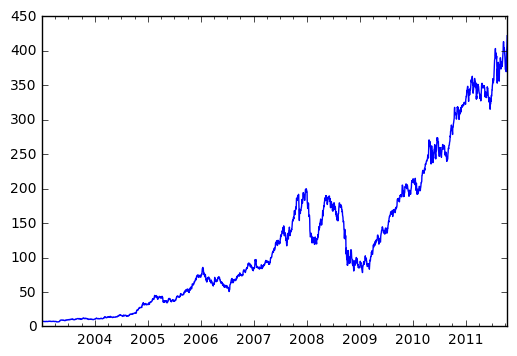

In [93]:
close_px['AAPL'].plot()

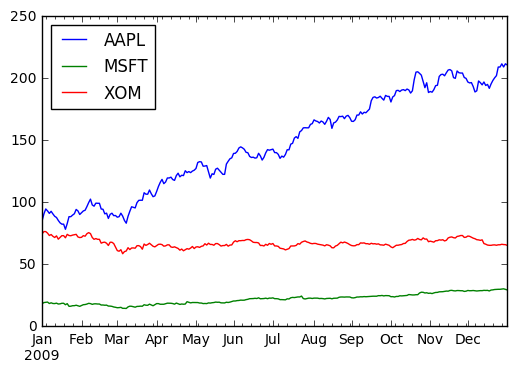

In [94]:
close_px.ix['2009'].plot()

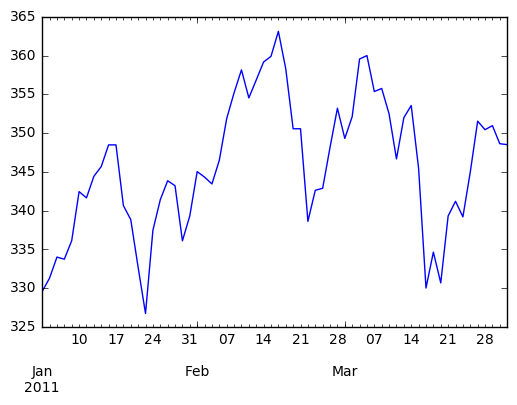

In [95]:
close_px['AAPL'].ix['01-2011':'03-2011'].plot()

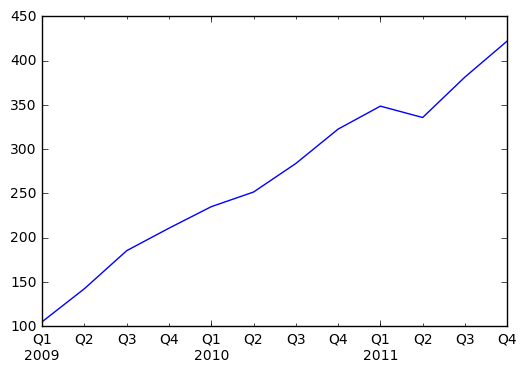

In [96]:
appl_q = close_px['AAPL'].resample('Q-DEC').ffill()
appl_q.ix['2009':].plot()

## 八、移动窗口函数

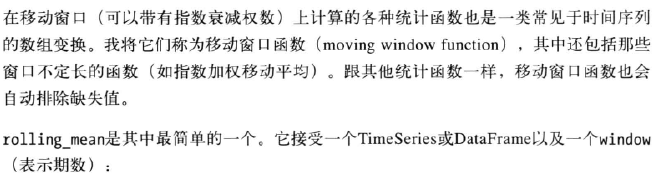

In [97]:
Image(filename="py35_picture\Moving Window Functions.png")

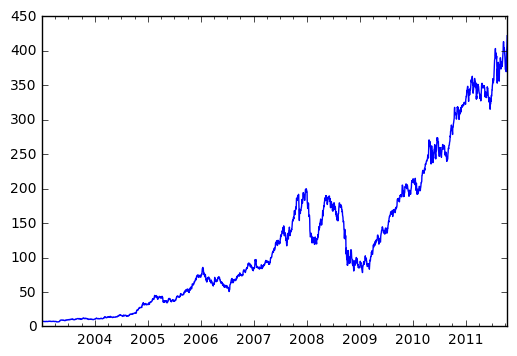

In [98]:
close_px.AAPL.plot()

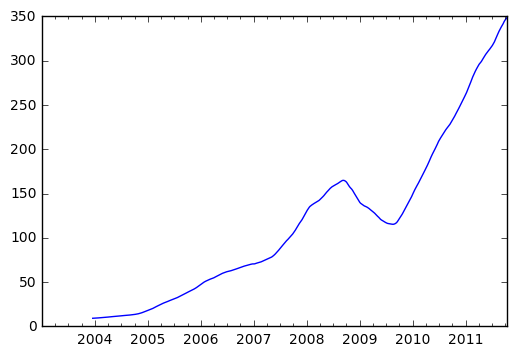

In [102]:
pd.Series.rolling(close_px.AAPL, 250).mean().plot()

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64


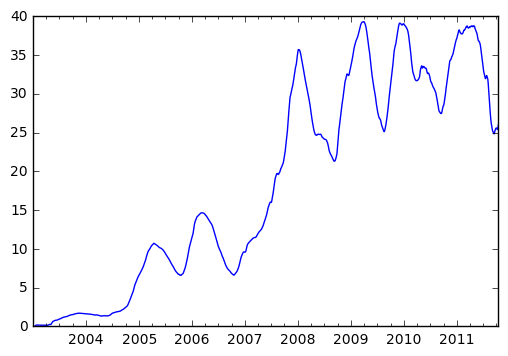

In [108]:
appl_std250 = pd.Series.rolling(close_px.AAPL, 250, min_periods=10).std()
print(appl_std250[5:12])
appl_std250.plot()

In [107]:
# 通过rolling定义扩展平均
expanding_mean = lambda x: rolling_mean(x, len(x), min_periods=1)

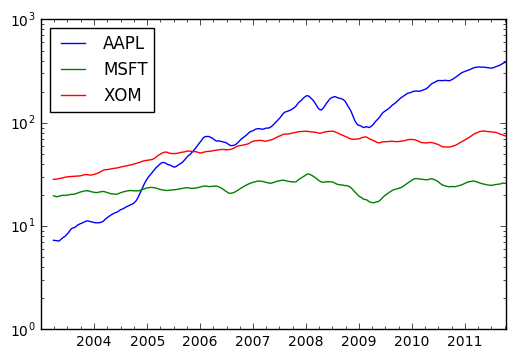

In [106]:
pd.Series.rolling(close_px, 60).mean().plot(logy=True)

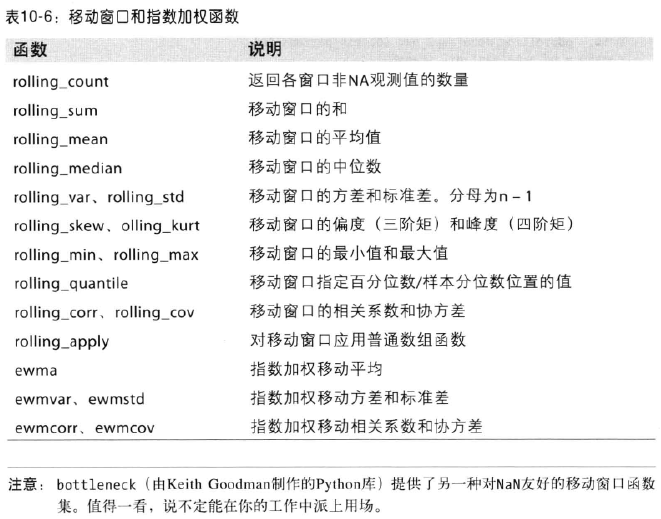

In [109]:
Image(filename="py35_picture\Moving window and exponentially-weighted functions.png")

### 1 指数加权函数

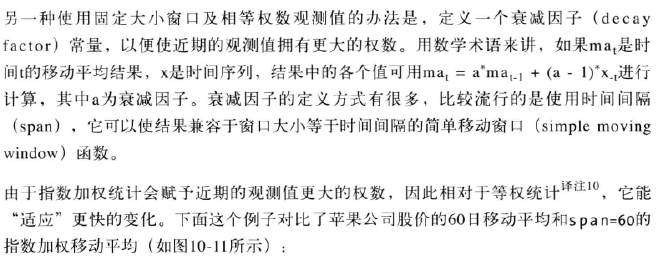

In [25]:
Image(filename="py35_picture\Exponentially-weighted functions.png")

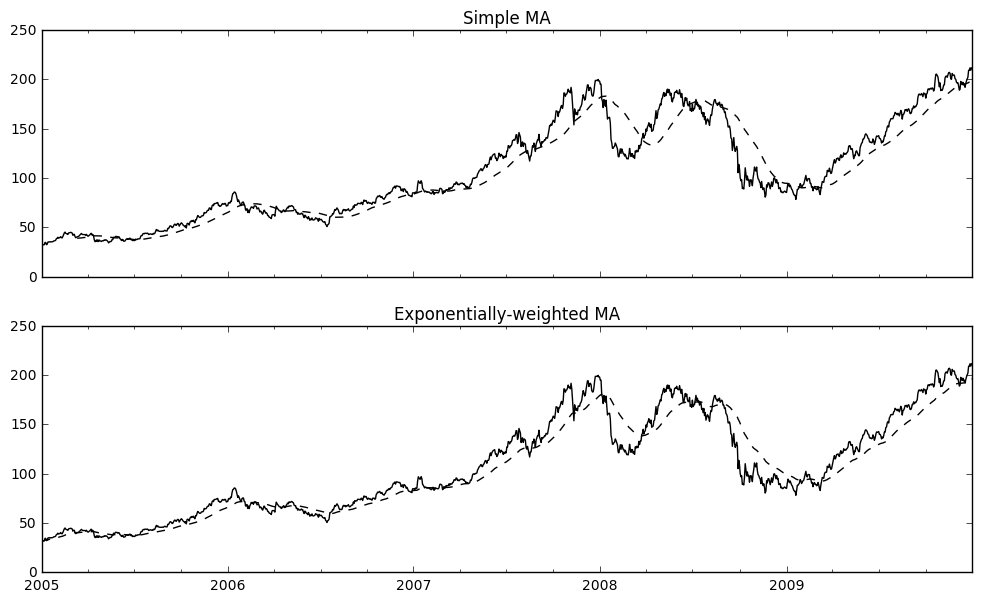

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True,figsize=(12, 7))
aapl_px = close_px.AAPL['2005':'2009']
ma60 = pd.Series.rolling(aapl_px, 60, min_periods=50).mean()
ewma60 = pd.Series.ewm(aapl_px, span=60).mean()
aapl_px.plot(style='k-', ax=axes[0])
ma60.plot(style='k--', ax=axes[0])
aapl_px.plot(style='k-', ax=axes[1])
ewma60.plot(style='k--', ax=axes[1])
axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially-weighted MA')

### 2 二元移动窗口函数

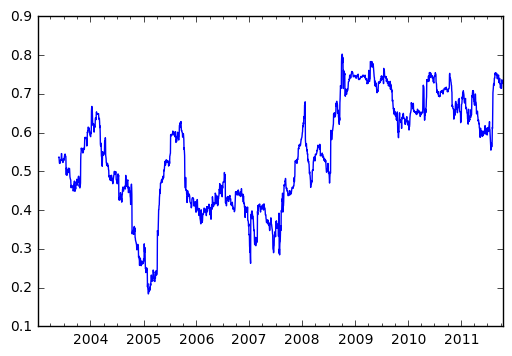

In [11]:
spx_px = close_px_all['SPX']
spx_rets = spx_px / spx_px.shift(1) - 1
returns = close_px.pct_change()
corr = pd.Series.rolling(returns.AAPL, 125, min_periods = 100).corr(spx_rets)
corr.plot()

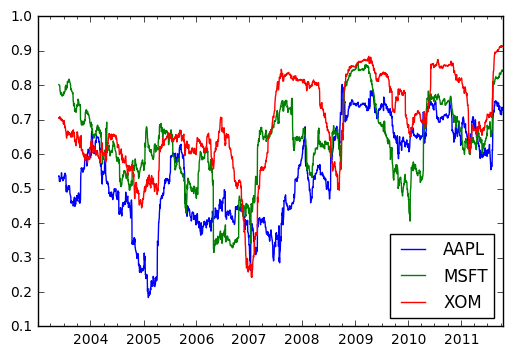

In [12]:
# 多只股票与标准普尔500指数的相关系数
corr = pd.Series.rolling(returns, 125, min_periods = 100).corr(spx_rets)
corr.plot()

### 3 用户定义的移动窗口函数

In [27]:
Image(filename="py35_picture\User Defined.png")

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 12-13: truncated \UXXXXXXXX escape (<ipython-input-27-f28b7854afa9>, line 1)

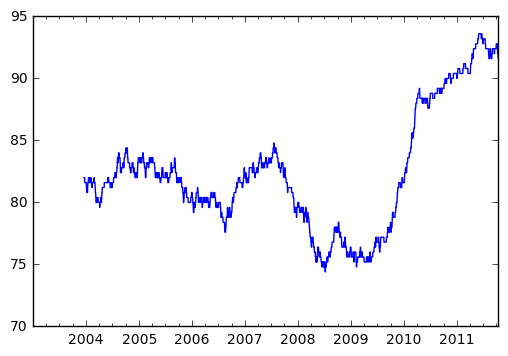

In [29]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = pd.Series.rolling(returns.AAPL, 250).apply(score_at_2percent)
result.plot()

## 九、性能和内存使用方面的注意事项